In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('HateSpeechDataset.csv',sep=',')
col_names = ['Toxicity', 'Tweet']
dataset.columns=col_names
dataset

,Toxicity,Tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [3]:
dataset.describe()

,Toxicity
count,56745.000000
mean,0.425641
std,0.494444
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<AxesSubplot:xlabel='Toxicity', ylabel='count'>

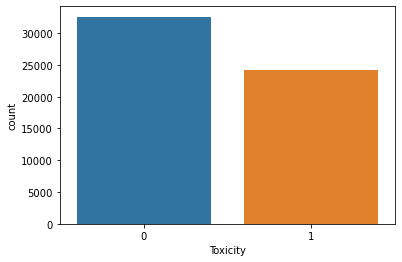

In [4]:
import seaborn as sns

sns.countplot(x='Toxicity', data= dataset)

In [5]:
dataset.Toxicity.value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [6]:
stop_words = stopwords.words('english') + ['@user']
print(stop_words)
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
X = dataset.Tweet
y = dataset.Toxicity

In [8]:
X = vectorizer.fit_transform(dataset.Tweet)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['user'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=100)

# Implementing Knn algorithm

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
predict_Knn = knn.predict(X_test)

In [14]:
roc_auc_score(y_test, predict_Knn)

0.5530303155733634

In [15]:
print(accuracy_score(y_test, predict_Knn))

0.622169354128117


In [16]:
print(confusion_matrix(y_test, predict_Knn))

[[6523   42]
 [4246  538]]


In [17]:
print(classification_report(y_test, predict_Knn))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75      6565
           1       0.93      0.11      0.20      4784

    accuracy                           0.62     11349
   macro avg       0.77      0.55      0.48     11349
weighted avg       0.74      0.62      0.52     11349



# Predicting By Knn

In [18]:
import numpy as np
review_1 = np.array(["It was a good movie. I enjoyed watching the movie a lot!!"])

review_1 = vectorizer.transform(review_1)

print(knn.predict(review_1))

[0]


In [19]:
review_2 = np.array(["Shut up!! you idiot"])
review_2 = vectorizer.transform(review_2)

print(knn.predict(review_2))

[0]


In [21]:
review_3 = np.array(["You rascal!! you idiot"])
review_3 = vectorizer.transform(review_3)

print(knn.predict(review_3))

[1]


# Implementing Naive Bayes algorithm

In [35]:
NB_model = naive_bayes.MultinomialNB()
NB_model.fit(X_train, y_train)
predict_NB = NB_model.predict(X_test)

In [36]:
roc_auc_score(y_test, predict_NB)

0.9180612354713732

In [37]:
print(accuracy_score(y_test, predict_NB))

0.920521631861838


In [38]:
print(confusion_matrix(y_test, predict_NB))

[[6130  435]
 [ 467 4317]]


In [39]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6565
           1       0.91      0.90      0.91      4784

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



# Predicting By Naive Bayes

In [40]:
review_4 = np.array(["It was a good food. I liked it!!"])

review_4 = vectorizer.transform(review_4)

print(NB_model.predict(review_4))

[0]


In [41]:
review_5 = np.array(["shut up!! you crazy"])

review_5 = vectorizer.transform(review_5)

print(NB_model.predict(review_5))

[1]


# Implementing Logistic Regression

In [42]:
logistic_R = LogisticRegression(random_state = 0)
logistic_R.fit(X_train, y_train)

predict_LR= logistic_R.predict(X_test)

In [43]:
roc_auc_score(y_test, predict_LR)

0.9301129590383788

In [44]:
print(accuracy_score(y_test, predict_LR))

0.9373513084853291


In [45]:
print(confusion_matrix(y_test, predict_LR))

[[6409  156]
 [ 555 4229]]


In [46]:
print(classification_report(y_test, predict_LR))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6565
           1       0.96      0.88      0.92      4784

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.93     11349
weighted avg       0.94      0.94      0.94     11349



# Predicting by Logistic Regression

In [65]:
review_6 = np.array(["This place has a nice ambience and good food!!"])

review_6 = vectorizer.transform(review_6)

print(logistic_R.predict(review_6))

[0]


In [66]:
review_7 = np.array(["You idiote! shut up"])

review_7 = vectorizer.transform(review_7)

print(logistic_R.predict(review_7))

[1]


# Implementing SVM algorithm

In [55]:
svm_model = svm.SVC(kernel="linear")
svm_model.fit(X_train, y_train)
predict_svm = svm_model.predict(X_test)

In [56]:
roc_auc_score(y_test, predict_svm)

0.9425680486108812

In [57]:
print(accuracy_score(y_test, predict_svm))

0.9476605868358445


In [58]:
print(confusion_matrix(y_test, predict_svm))

[[6401  164]
 [ 430 4354]]


In [59]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6565
           1       0.96      0.91      0.94      4784

    accuracy                           0.95     11349
   macro avg       0.95      0.94      0.95     11349
weighted avg       0.95      0.95      0.95     11349



# Predicting by SVM

In [60]:
review_8 = np.array(["You are such a good person!"])

review_8 = vectorizer.transform(review_8)

print(svm_model.predict(review_8))

[0]


In [64]:
review_9 = np.array(["You crazy! shut up your mouth"])

review_9 = vectorizer.transform(review_9)

print(logistic_R.predict(review_9))

[1]
